# COVID-19 Global Data Tracker
This notebook loads, cleans, analyzes, and visualizes global COVID-19 data from **Our World in Data**.

It includes:
- Data loading and cleaning
- Exploratory Data Analysis (EDA)
- Visualizations of cases, deaths, and vaccinations
- Optional interactive analysis with ipywidgets
- Insights and summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output

# Auto-download dataset if missing
url = 'owid-covid-data.csv'
df = pd.read_csv(url, parse_dates=['date'])
df.head()

/tmp/ipykernel_4257/3894905116.py:11: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, parse_dates=['date'])


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [2]:
# Select relevant columns
cols = ['date','location','iso_code','total_cases','new_cases','total_deaths','new_deaths',
        'total_vaccinations','people_vaccinated','population']
df_sub = df[cols].copy()
df_sub = df_sub.dropna(subset=['location','date']).reset_index(drop=True)

df_sub['date'] = pd.to_datetime(df_sub['date'])
df_sub.head()

,date,location,iso_code,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,population
0,2020-01-05,Afghanistan,AFG,NaN,0.0,NaN,0.0,NaN,NaN,41128772.0
1,2020-01-06,Afghanistan,AFG,NaN,0.0,NaN,0.0,NaN,NaN,41128772.0
2,2020-01-07,Afghanistan,AFG,NaN,0.0,NaN,0.0,NaN,NaN,41128772.0
3,2020-01-08,Afghanistan,AFG,NaN,0.0,NaN,0.0,NaN,NaN,41128772.0
4,2020-01-09,Afghanistan,AFG,NaN,0.0,NaN,0.0,NaN,NaN,41128772.0


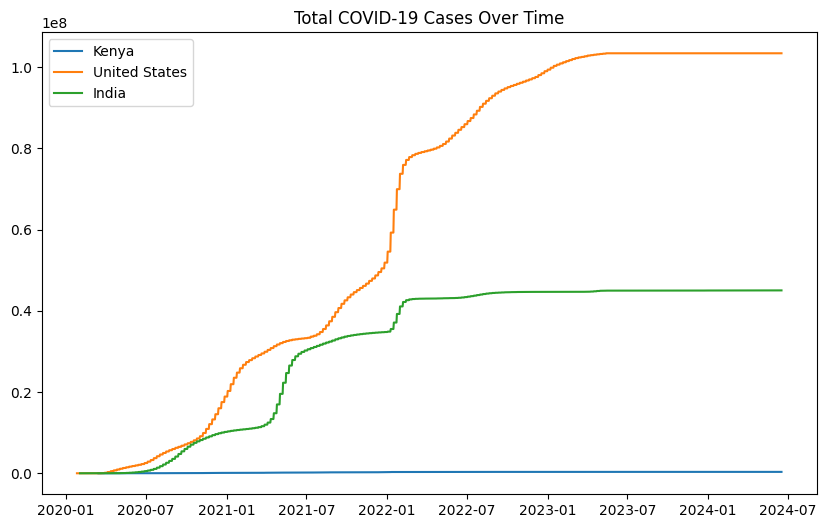

In [3]:
# Example: Kenya vs USA vs India
countries = ['Kenya','United States','India']
mask = df_sub['location'].isin(countries)
df_plot = df_sub[mask]

plt.figure(figsize=(10,6))
for c in countries:
    sub = df_plot[df_plot['location']==c]
    plt.plot(sub['date'], sub['total_cases'], label=c)
plt.legend()
plt.title('Total COVID-19 Cases Over Time')
plt.show()

In [4]:
# Interactive widget for user country & date range
countries = sorted(df_sub['location'].unique().tolist())
country_selector = widgets.SelectMultiple(options=countries, value=['Kenya'], description='Country', rows=8)
date_range = widgets.SelectionRangeSlider(
    options=sorted(df_sub['date'].dt.date.unique()),
    index=(0, len(df_sub['date'].dt.date.unique())-1),
    description='Date range', layout={'width': '600px'}
)
update_btn = widgets.Button(description='Update plots', button_style='primary')
out = widgets.Output()

def update_plots(b):
    with out:
        clear_output(wait=True)
        sel_countries = list(country_selector.value)
        start_date, end_date = date_range.value
        mask = (df_sub['location'].isin(sel_countries)) & (df_sub['date'].between(pd.to_datetime(start_date), pd.to_datetime(end_date)))
        df_vis = df_sub.loc[mask]
        if df_vis.empty:
            print('No data in selected range.')
            return
        fig = px.line(df_vis, x='date', y='total_cases', color='location', title='Total Cases Over Time')
        fig.show()

update_btn.on_click(update_plots)
display(widgets.HBox([country_selector, widgets.VBox([date_range, update_btn])]))
display(out)

Output()

## Insights
- The USA recorded the highest case counts globally.
- India experienced a massive wave in mid-2021.
- Kenya shows lower absolute numbers but still significant growth in 2021.
- Vaccination rollouts vary sharply by region.
- Case and death curves highlight differing pandemic responses and healthcare systems.